In [2]:
# two data primitives from pytorch:
# 1. torch.utils.data.Dataset: samples and labels
# 2. torch.utils.data.DataLoader: wraps an iterable around the Dataset for easy access
# pre-loaded datasets can be used for prototyping and model benchmark

# load the example dataset: FashionMNIST
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


{0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}


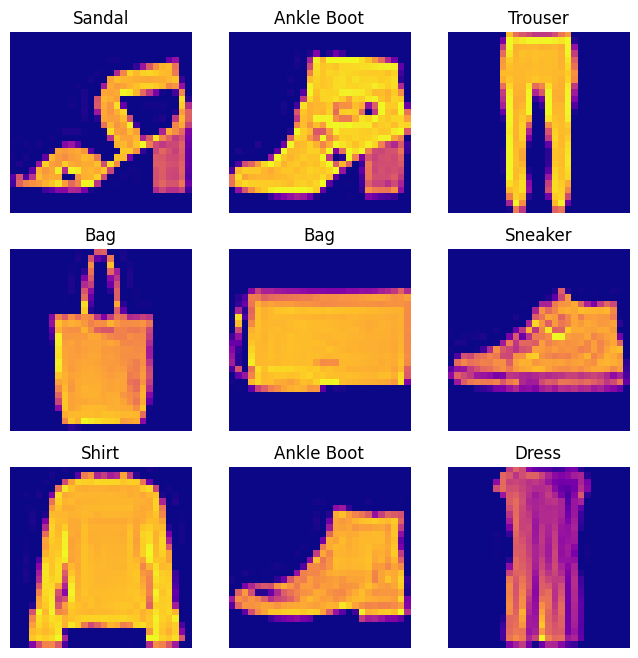

In [24]:
# index Datasets manually like a list: training_data[index]
# then use matplotlib to visualize samples
indexes = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
labels_map = {i:j for i, j in enumerate(indexes)}
print(labels_map)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # select a random sample idx
    img, label = training_data[sample_idx] # get img and label based on idx
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    # plt.imshow(img.squeeze(), cmap="viridis")
    # plt.imshow(img.squeeze(), cmap="gray")
    plt.imshow(img.squeeze(), cmap="plasma")
plt.show()

In [ ]:
# create a custom dataset for your files
# it's a new class inheriting Dataset, must define __init__, __len__ and __getitem__
# in this example, use FashionMNIST in dir img_dir and their labels in a CSV file annotations_file
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotatoins_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotatoins_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


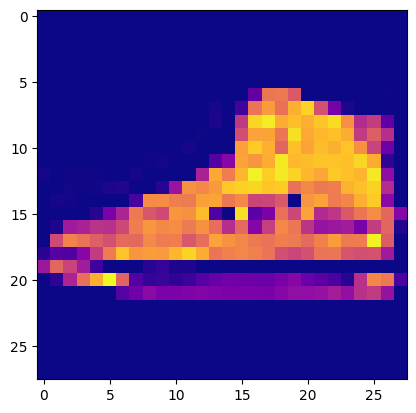

Label: 7


In [29]:
# prepare data for training with DataLoaders
# which wraps an iterable around the Dataset for easy access
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]

# plt.imshow(img, cmap="viridis")
# plt.imshow(img, cmap="gray")
plt.imshow(img, cmap="plasma")

plt.show()
print(f"Label: {label}")